# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 28, 2022 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 18 | 22 |
| **Actual no disease**       | 10 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 23 | 17 |
| **Actual no disease**       | 20 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The actual disease class is likely to be the positive class because that is the thing we are interested in finding out here. Having the disease is likely more interesting and important for us to know than them not having the disease

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = (18 + 100) / (18+22+10+100)
results_dict["B"]["accuracy"] = (23+90) / (23+17+20+90)

In [4]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [5]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [6]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Based solely on the accuracy metric, I would pick model A because it is higher than model B

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [7]:
results_dict["A"]["precision"] = 18 /(18+10)
results_dict["B"]["precision"] = 23/(23+20)
results_dict["A"]["recall"] = 18 / (18+22)
results_dict["B"]["recall"] = 23 / (23+17)
results_dict["A"]["f1"] = 2 * (results_dict["A"]["precision"] * results_dict["A"]["recall"])/(results_dict["A"]["precision"] + results_dict["A"]["recall"])
results_dict["B"]["f1"] = 2 * (results_dict["B"]["precision"] * results_dict["B"]["recall"])/(results_dict["B"]["precision"] + results_dict["B"]["recall"])




In [8]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [9]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [10]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [14]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333
precision,0.642857,0.534884
recall,0.450000,0.575000
f1,0.529412,0.554217


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1. I believe that the recall is more informative because we really want to make sure that everybody that did have the disease was able to be identified by the model. Since the recall is quite low, we see that there is a lot of false negatives, or cases where the model thought they did not have the disease, which can have serious implications in real-world applications. 
2. Given this, I would pick model B because the recall score is much better than the recall score for model A. That being said, both are still quite low.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [15]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [16]:
train_df["churn"].value_counts()

False    1984
True      349
Name: churn, dtype: int64

We can see in the train set, that there is a big imbalance between the number of "False" cases and the number of "True" cases. According to the data set, it says that the "dataset where most of the customers stay with the service and a small minority cancel their subscription", so we already know that there would be more cases of "False" than true. Therefore we do need to deal with it because every time we see an instance of "True" in this majority false dataset, it should have more impact than if we see "False" like we expect.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [17]:
from sklearn.impute import SimpleImputer

X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

X_train.info()
X_train.describe(include="all")

numeric_features = ["account length",
                    "number vmail messages",
                   "total day minutes",
                   "total day calls",
                   "total day charge",
                   "total eve minutes",
                   "total eve calls",
                   "total eve charge",
                   "total night minutes",
                   "total night calls",
                   "total night charge",
                   "total intl minutes",
                   "total intl calls",
                   "total intl charge",
                   "customer service calls"]
categorical_features = ["state", "area code"]
binary_features = ["international plan", "voice mail plan"]
drop_features = ["phone number"]

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features), 
    (make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"), OneHotEncoder(handle_unknown="ignore", sparse=False)), categorical_features),
    (make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(drop="if_binary", dtype=int)), binary_features),
    ("drop", drop_features),
)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 1402 to 1346
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       2333 non-null

Numeric features: We apply scaling to our numeric features, which mostly consist of number of calls in day, eve, night and international. Since they have different ranges, where number of calls is likely a lot less than minutes called for instance, we want to scale them so no features overshadow another.
Categorical features: Given that state is in text form, we want to convert it to a manner that our model on operate on. On the other hand, for area code, it is only numeric looking, so it still represents a manner of classifying different areas in a state, therefore, we want to give it the same treatment as the states, by using one hot encoding.
Binary Features: Both of these features are binary, so we apply one hot encoding to both of them so our model can incorporate them.
Lastly, for drop features, we drop phone number because each person will have their own unique number, so each phone number would end up being a new feature. Not only does this make computation more time-consuming, the model wont learn any useful relations as there will only be one example where the feature is non-zero.

We do simple imputing for all of them just in case we run into a situation where another version of the dataset or the test set does have missing data

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [18]:
#adapted from lec 10
preprocessor.fit_transform(X_train)
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 'pipeline-3': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(drop='if_binary', dtype=<class 'int'>))]),
 'drop': 'drop'}

In [19]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names(categorical_features)
)
ohe_columns2 = list(
    preprocessor.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names(binary_features)
)
new_columns = numeric_features + ohe_columns + ohe_columns2
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

C:\Users\danie\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_yes,voice mail plan_yes
1402,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1483,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2638,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

In [20]:
X_train["area code"].value_counts()

415    1178
408     588
510     567
Name: area code, dtype: int64

These area codes are not continuous, so each individual area code represents a location, much like how text would represent whatever the text says. Therefore, this numeric feature isn't actually numeric, but rather categorical. Therefore, we need to do one-hot-encoding on it. 
The possible values of area code were 415, 408 and 510
The new features created were "area code_408", "area code_415", and "area code_510" which represent whether the example's area code is indeed that feature's (the feature would output a 1 if so).

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [21]:
from sklearn.metrics import precision_score
#taken from lec 9
pipedum = make_pipeline(
    preprocessor, DummyClassifier()
)

scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]  # scoring can be a string, a list, or a dictionary
scores = cross_validate(
    pipedum, X_train, y_train, return_train_score=True, scoring=scoring
)


pd.DataFrame(scores)

C:\Users\danie\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danie\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_cl

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.016000,0.009501,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015000,0.008497,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
2,0.018500,0.011500,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015003,0.008499,0.851931,0.850027,0.0,0.0,0.0,0.0,0.0,0.0
4,0.015001,0.009001,0.849785,0.850562,0.0,0.0,0.0,0.0,0.0,0.0


We can see that we have a fairly high accuracy, but 0 for everything else. The scoring is counting "churn" = true as the positive case (default parameter for these scoring says pos_label = 1, and in this case "churn = True" is label 1 and "churn = False" is label 0), so because the dummy classifier is always outputting false (as false is the most common in y_train), we have that our true positive is always 0. Therefore, for recall, precision, and f1, we have a score of 0 due to having no true positives.. or any predicted positives.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [22]:
pipelr = make_pipeline(
    preprocessor, LogisticRegression()
)
scores2 = cross_validate(
    pipelr, X_train, y_train, return_train_score=True, scoring=scoring
)

pd.DataFrame(scores2)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.035500,0.008500,0.869379,0.864416,0.371134,0.332454,0.257143,0.225806,0.666667,0.630000
1,0.033500,0.008501,0.852248,0.868167,0.273684,0.362694,0.185714,0.250896,0.520000,0.654206
2,0.033501,0.009501,0.850107,0.867095,0.255319,0.364103,0.171429,0.254480,0.500000,0.639640
3,0.031001,0.008502,0.869099,0.863953,0.371134,0.345361,0.260870,0.239286,0.642857,0.620370
4,0.032496,0.008003,0.839056,0.868773,0.242424,0.373402,0.171429,0.261649,0.413793,0.651786


We can see here that the test accuracy is around the same area as the dummy classifier, which is good as we don't ever want to perform worse than that. That being said, the results are still not satisfying as the recall and f1 scores are very low. This suggests that the amount of true positives(churn = True) we managed to predict is incredibly low. Precision is a little higher, suggesting that we don't have a lot of predicted positives in the first place. This demonstrates the effect of having a large class imbalance, as the number of false cases overwhelm the true cases.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [23]:
pipelr2 = make_pipeline(
    preprocessor, LogisticRegression(class_weight = 'balanced')
)
scores3 = cross_validate(
    pipelr2, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores3)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.041998,0.012000,0.785867,0.769561,0.489796,0.497664,0.685714,0.763441,0.380952,0.369151
1,0.042500,0.008500,0.768737,0.771168,0.490566,0.504065,0.742857,0.777778,0.366197,0.372852
2,0.038002,0.008501,0.764454,0.774384,0.455446,0.511034,0.657143,0.788530,0.348485,0.378007
3,0.036999,0.008500,0.751073,0.779325,0.462963,0.517564,0.724638,0.789286,0.340136,0.385017
4,0.039502,0.007999,0.733906,0.786824,0.436364,0.531765,0.685714,0.810036,0.320000,0.395797


I do prefer this one a little more than the previous model. Since we see that recall is higher, we know that we managed to predict quite a good number of true positives ('churn' = True) in a dataset with overwhelming number of negative cases. Therefore, we can see the power of the class weight balancing. Precision is lower because we will have made positive cases more impactful, so a byproduct of that is it will predict true more often. Given that the dataset is still overwhelmingly negative, we will have a fair number of false positives. That being said, it does create a better balance of recall and precision, demonstrated by the f1 score, which is roughly 15% higher than the previous model. While the accuracy is a bit lower than the dummy classifier, but accuracy isn't a good metric when there is a large class imbalance like there is in this dataset.    

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [24]:
# values taken from last homework and slighly modified to include more
C_vals = 10.0 ** np.arange(-3, 3, 0.5)

train_scores = []
cv_scores = []

param_grid = {
    "logisticregression__C": C_vals,
    "logisticregression__class_weight": [None, 'balanced'],
}
pipelr3 = make_pipeline(
    preprocessor, LogisticRegression()
)
grid_search = GridSearchCV(
    pipelr3, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring='f1'
)

grid_search.fit(X_train, y_train) # all the work is done here
print(grid_search.best_params_)
print(grid_search.best_score_)

{'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced'}
0.47873599874436196


Our best hyperparamters are a value of C=0.1 and the class_weight set to balanced. The cv f1 score for these hyperparamters is 0.4787.

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

              precision    recall  f1-score   support

       False       0.95      0.77      0.85       866
        True       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



C:\Users\danie\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


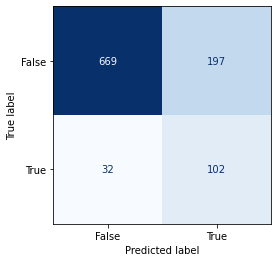

In [25]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve



pipelr4 = pipelr3 = make_pipeline(
    preprocessor, LogisticRegression(C=0.1, class_weight='balanced')
)

pipelr4.fit(X_train, y_train)
disp = plot_confusion_matrix(
    pipelr4,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    colorbar=False,
)

print(
    classification_report(
        y_test, pipelr4.predict(X_test)
    )
)


While we have a fairly low number of false negatives so we have a high precision for the negatives, we do have a decently high number of false positives and therefore have low positive precision. We can definitely see that using weighted average increase the predictive power of the model if we look at the macro averages vs weighted averages. Given that we have a massive imbalance between classes, this is also a good sign as "true" is an uncommon occurance and we want our model to catch that. Recall is even for both, demonstrating that it does do a nice job at identifying their respective class examples.

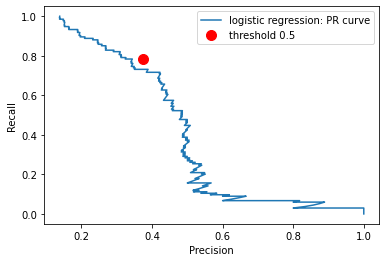

In [26]:
precision, recall, thresholds = precision_recall_curve(
    y_test, pipelr4.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_train, pipelr4.predict(X_train)),
    recall_score(y_train, pipelr4.predict(X_train)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")

Ideally we would want a curve that hits the top right, but we can see that this curve goes nowhere near that far. Here we have high recall but low precisions. Increasing the threshold looks like it will drop recall significantly, but only slightly increase precision, does not seem like a good tradeoff. On the other hand, if we lower then threshold, we see that our recall will increase, but our precision will decrease at roughly the same rate.

AUC for logistic regression: 0.823


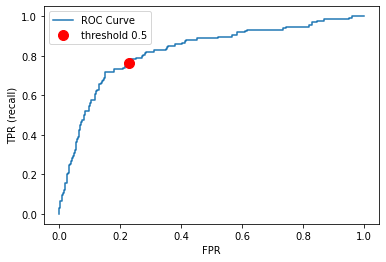

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pipelr4.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")

from sklearn.metrics import roc_auc_score

roc_lr = roc_auc_score(y_test, pipelr4.predict_proba(X_test)[:, 1])
print("AUC for logistic regression: {:.3f}".format(roc_lr))

Lastly, we can see here that the ROC curve's shape is how we want it to look. The curve should be near the upper left, and while it isn't completely there in this case, it is relatively close. As for the area under curve, we have a fairly high AUC, telling us that if we were to pick a random positive point, it would likely have a higher score than a randomly picked point from the negative class, according to the classifier. This tells us that while it is fairly good at distinguishing between positive points and negative points, it does struggle and misidentify. It is definitely better than if it were 0.5, which would just be randomly classifying the points.

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [28]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [29]:
house_train, house_test = train_test_split(housing_df, test_size=0.2, random_state=123)
house_train
numeric_features=house_train.drop(columns=["MedHouseVal"]).columns



In [30]:
preprocessorreg = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features),
)


X_trainh = house_train.drop(columns=["MedHouseVal"])
X_testh = house_test.drop(columns=["MedHouseVal"])

y_trainh = house_train["MedHouseVal"]
y_testh = house_test["MedHouseVal"]


We need to scale the dataset given that each feature has a vastly different scale from each other.

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [31]:
pipelinereg = make_pipeline(
    preprocessorreg, DummyRegressor()
)

scores = pd.DataFrame(cross_validate(
    pipelinereg, X_trainh, y_trainh, cv=5, return_train_score=True))
scores.mean()

fit_time       0.006898
score_time     0.002100
test_score    -0.000147
train_score    0.000000
dtype: float64

The default metric for all of sklearn regression is R^2

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [32]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

results_dict = {}

for model in models:
    newpipe = make_pipeline(
        preprocessorreg, models[model]
    )
    results_dict[model] = pd.DataFrame(cross_validate(newpipe, X_trainh, y_trainh,
                            scoring=score_types_reg)).mean()
    
pd.DataFrame(results_dict).T


,fit_time,score_time,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_r2,test_mape_scorer
Ridge,0.0080,0.0033,-0.683433,-0.810381,-0.535444,0.481744,-31.979551
Random Forest,6.3901,0.0735,-0.264792,-0.514451,-0.335683,0.800980,-18.926472


The dummyclassifier uses r2 score, so if we compare that, we see that the r2 is much better in these two models as we want it to be as close to 1 as possible. We see that the random forest is the best out of the three classifiers we've seen in that regard. Otherwsise, we see that the three mean errors have a close to 0 error which is good, with random forest performing better. Lastly, for mape, we see Random Forest doing better than Ridge in this metric as the value is closer to 0 Although, it is still a decently big error as it is nearly 20%. As such, Random Forest seems to be doing the best.

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [33]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

newpipe2 = make_pipeline(
    preprocessorreg, Ridge()
)

rand_search = RandomizedSearchCV(newpipe2, param_dist, n_jobs = -1, scoring = "neg_root_mean_squared_error")
rand_search.fit(X_trainh, y_trainh)

print(rand_search.best_params_)
print(rand_search.best_score_)

{'ridge__alpha': 0.002269252227374439}
-0.81037027024494


Using the neg_root_mean_squared_error with our best found value for alpha seems to get us a root mean squared error of 0.81037 vs the default's 0.81038. This is means it is marginally better than the default value and thus, does perform better

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [34]:
newpipe3 = make_pipeline(
    preprocessorreg, RandomForestRegressor()
)

newpipe3.fit(X_trainh, y_trainh)
print("The testing set score is:", newpipe3.score(X_testh, y_testh))

The testing set score is: 0.8151070945474366


We can see that the testing set score is 0.8145, using sklearns default scoring system of R^2, which is better than the cv score of 0.8019 that we found earlier using the R^2 metric. As such, our model is very close to our cross-validation score, which is good for trustworthyness, and also higher than the score which means it generalizes well.

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [35]:
pipefinal = make_pipeline(preprocessorreg, Ridge(alpha=rand_search.best_params_['ridge__alpha']))
pipefinal.fit(X_trainh, y_trainh)
                          
new_cols = numeric_features                          
df = pd.DataFrame(
    data={
        "features": new_cols,
        "coefficients": pipefinal.named_steps["ridge"].coef_,
    }
)
df.sort_values("coefficients",ascending=False)
                          

,features,coefficients
0,MedInc,0.836010
3,AveBedrms,0.318289
1,HouseAge,0.115221
4,Population,-0.007404
5,AveOccup,-0.041683
2,AveRooms,-0.281901
7,Longitude,-0.855547
6,Latitude,-0.890148


Increasing the MedInc AveBedrms, and HouseAge features would result in a higher housing price.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 